In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # statistical analysis of data.
import matplotlib.pyplot as plt # plotting graph

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


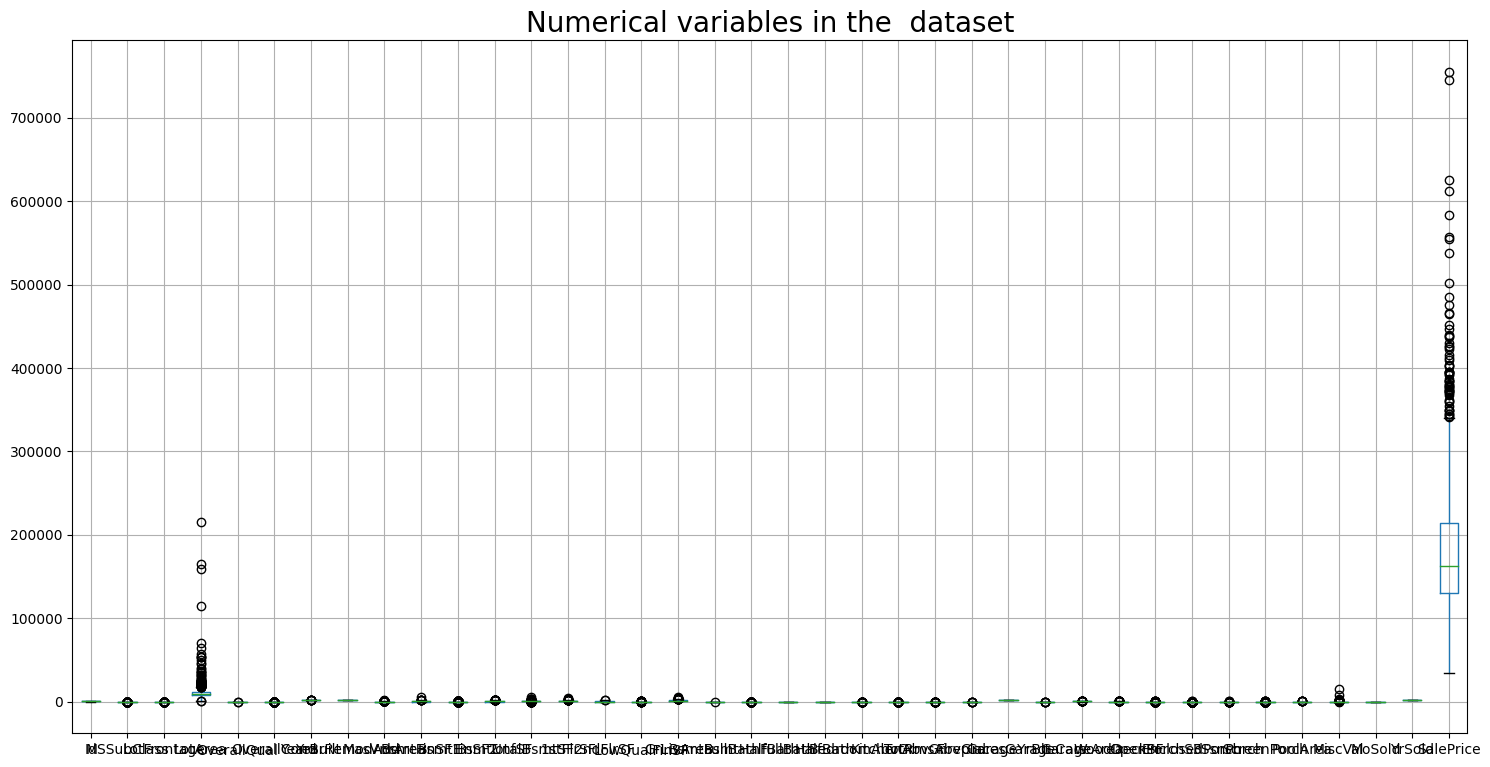

In [4]:
num_cols = train_data.describe().columns
plt.figure(figsize=(18,9))
train_data[num_cols].boxplot()
plt.title("Numerical variables in the  dataset", fontsize=20)
plt.show()

In [5]:
train_data.drop(['LotFrontage'], axis =1, inplace = True) #removed LotFrontage feature due large No. of outliers
test_data.drop(['LotFrontage'], axis =1, inplace = True)

# defining a pre-processing class

In [6]:
class data_preprocessor:
    
    def __init__(self, data):
        self.data = data
    
    def handle_non_numeric(self, df):
        df.fillna(-1, inplace = True)
        columns = df.columns
        for column in columns:
            text_to_num = { -1:-1 }
            def convert_to_num(val):
                return text_to_num[val]
            
            if df[column].dtype != np.int64 and df[column].dtype != np.float64:
                column_contents = df[column].values.tolist()
                unique_elements = set(column_contents)
                x=1
                for uniq_value in unique_elements:
                    if uniq_value not in text_to_num  and uniq_value != -1:
                        text_to_num[uniq_value] = x
                        x+=1       
                df[column] = list(map(convert_to_num, df[column]))
        return df
    
    def run(self):
        self.data = self.handle_non_numeric(self.data)
        return self.data
    
train_target = train_data['SalePrice']
    
train_data.drop(['Id','SalePrice'], axis = 1,inplace = True)
test_data.drop(['Id'], axis = 1, inplace = True)

train_data = data_preprocessor(train_data).run()
test_data = data_preprocessor(test_data).run()
train_data

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,4,8450,2,-1,3,3,2,5,2,...,0,0,-1,-1,-1,0,2,2008,7,6
1,20,4,9600,2,-1,3,3,2,3,2,...,0,0,-1,-1,-1,0,5,2007,7,6
2,60,4,11250,2,-1,1,3,2,5,2,...,0,0,-1,-1,-1,0,9,2008,7,6
3,70,4,9550,2,-1,1,3,2,4,2,...,0,0,-1,-1,-1,0,2,2006,7,1
4,60,4,14260,2,-1,1,3,2,3,2,...,0,0,-1,-1,-1,0,12,2008,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,4,7917,2,-1,3,3,2,5,2,...,0,0,-1,-1,-1,0,8,2007,7,6
1456,20,4,13175,2,-1,3,3,2,5,2,...,0,0,-1,3,-1,0,2,2010,7,6
1457,70,4,9042,2,-1,3,3,2,5,2,...,0,0,-1,1,4,2500,5,2010,7,6
1458,20,4,9717,2,-1,3,3,2,5,2,...,0,0,-1,-1,-1,0,4,2010,7,6


# Implementing Linear Regression

In [7]:
from sklearn.svm import SVC
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix
 
# Building a Support Vector Machine on train data
svc_model = SVC(C=.1, kernel='linear', gamma=1)
svc_model.fit(train_data, train_target)
prediction = svc_model.predict(test_data)
 
# check the accuracy on the training set
print("The accuracy of the model is :", svc_model.score(train_data, train_target))

The accuracy of the model is : 0.9979452054794521


# Predictions on the test_data

In [8]:
print("The prediction on the test data is:")
prediction = np.array(prediction)
prediction = prediction.reshape(1459,1)
print(prediction)

The prediction on the test data is:
[[146800]
 [151500]
 [187500]
 ...
 [168000]
 [ 93500]
 [236000]]


In [12]:
import csv
Id = np.array(range(1461,2920))
prediction = np.array(prediction).reshape(1459,)
df = pd.DataFrame({'Id':Id , 'SalePrice':prediction})
df = np.array(df)
with open('test.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Id','SalePrice'])
    writer.writerows(df)
print(pd.read_csv('test.csv'))

        Id  SalePrice
0     1461     146800
1     1462     151500
2     1463     187500
3     1464     204000
4     1465     127500
...    ...        ...
1454  2915      97000
1455  2916      83500
1456  2917     168000
1457  2918      93500
1458  2919     236000

[1459 rows x 2 columns]
